# Efficient Frontier Part 2

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import edhec_risk_ins as eri

ins30 = eri.get_ins_returns()
er = eri.annualize_rets(ins30["1996":"2000"],12)
cov = ins30["1996":"2000"].cov()

In [2]:
er

Food     0.116799
Beer     0.141126
Smoke    0.107830
Games    0.068212
Books    0.187286
Hshld    0.134766
Clths    0.079160
Hlth     0.246641
Chems    0.077456
Txtls   -0.042721
Cnstr    0.084076
Steel    0.115809
FabPr    0.108280
ElcEq    0.272420
Autos    0.080954
Carry    0.173904
Mines   -0.053554
Coal     0.414689
Oil      0.165377
Util     0.145903
Telcm    0.122771
Servs    0.175264
BusEq    0.271952
Paper    0.097163
Trans    0.071099
Whlsl    0.126431
Rtail    0.207247
Meals    0.067400
Fin      0.223371
Other    0.043349
dtype: float64

In [89]:
def portfolio_return(weights,returns):
    """
    weights -> returns
    """
    return weights.T @ returns
#first transpose the weights vector and then multiply by return vector
# @ means vector multiplication

def portfolio_vol(weights,covmatrix):
    """
    weights -> vol
    """
    return (weights.T @ covmatrix @ weights)**0.5

In [90]:
l = ["Food", "Beer", "Smoke", "Coal"]
er[l]

Food     0.116799
Beer     0.141126
Smoke    0.107830
Coal     0.414689
dtype: float64

In [91]:
import numpy as np
cov.loc[l,l] #[row index, col index]

,Food,Beer,Smoke,Coal
Food,0.002609,0.002379,0.002061,0.000027
Beer,0.002379,0.005264,0.001359,0.001728
Smoke,0.002061,0.001359,0.008349,-0.000733
Coal,0.000027,0.001728,-0.000733,0.018641


In [92]:
import numpy as np
weights = np.repeat(1/4,4)
weights

array([0.25, 0.25, 0.25, 0.25])

In [93]:
eri.portfolio_return(weights,er[l])

0.19511097196038385

In [94]:
eri.portfolio_vol(weights,cov.loc[l,l])

0.055059195776437045

# 2 Asset Frontier

In [95]:
l =["Games", "Fin"]

In [104]:
n_point = 20
weights = [np.array([w,1-w]) for w in np.linspace(0,1,n_point)] #generate a sequence of numbers which are the asset weights. linspace is just linearly spaced points (equally spaced)
weights

[array([0., 1.]),
 array([0.05263158, 0.94736842]),
 array([0.10526316, 0.89473684]),
 array([0.15789474, 0.84210526]),
 array([0.21052632, 0.78947368]),
 array([0.26315789, 0.73684211]),
 array([0.31578947, 0.68421053]),
 array([0.36842105, 0.63157895]),
 array([0.42105263, 0.57894737]),
 array([0.47368421, 0.52631579]),
 array([0.52631579, 0.47368421]),
 array([0.57894737, 0.42105263]),
 array([0.63157895, 0.36842105]),
 array([0.68421053, 0.31578947]),
 array([0.73684211, 0.26315789]),
 array([0.78947368, 0.21052632]),
 array([0.84210526, 0.15789474]),
 array([0.89473684, 0.10526316]),
 array([0.94736842, 0.05263158]),
 array([1., 0.])]

In [105]:
len(weights)

20

In [102]:
er[l]

Games    0.068212
Fin      0.223371
dtype: float64

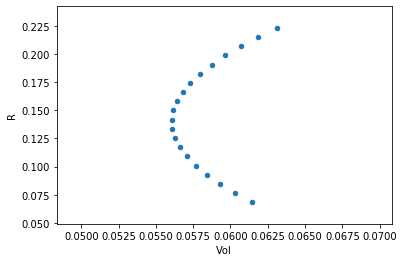

In [110]:
import numpy as np
rets = [eri.portfolio_return(w,er[l]) for w in weights]
vols = [eri.portfolio_vol(w,cov.loc[l,l]) for w in weights]
import pandas as pd 
ef = pd.DataFrame({"R":rets,"Vol":vols})
ef.plot.scatter(x="Vol", y="R")

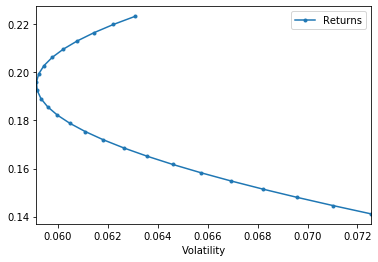

In [111]:
l = ["Fin","Beer"]
eri.plot_ef2(25,er[l],cov.loc[l,l])